# Introduction to Scipy: Interpolation and Integration

In this section, we will look at two other common sub-packages of Scipy: [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) and [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html).

## Interpolation

The simplest interpolation routine in [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) is [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d):

In [ ]:
from scipy.interpolate import interp1d

If we create a fake dataset:

In [ ]:
import numpy as np
x = np.array([0., 1., 3., 4.])
y = np.array([0., 4., 2.7, 2.08])

we can interpolate linearly by first creating an interpolating function:

In [ ]:
f = interp1d(x,y)

and we can then interpolate to any value of x within the original bounds:

In [ ]:
f(0.5)

In [ ]:
f(3.3)

It is also possible to interpolate to several values at the same time:

In [ ]:
f(np.array([0.5, 1.5, 2.5, 3.5]))

If the interpolating function is called outside the original range, an error is raised:

In [ ]:
f(-1.)

You can change this behavior by telling ``interp1d`` to not give an error in this case, but to use a set value:

In [ ]:
f = interp1d(x, y, bounds_error=False, fill_value=-10.)

In [ ]:
f(-1.0)

In [ ]:
f(np.array([-1., 1., 3., 6.]))

By default, ``interp1d`` uses linear interpolation, but it is also possible to use e.g. cubic **spline** interpolation:

In [ ]:
f = interp1d(x, y, kind='cubic')
f(0.5)

Let's compare a few ways to interpolate:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
xp=np.arange(0,4,0.1)
g = interp1d(x,y,kind=2) # equivalent to 'quadratic'
h = interp1d(x,y,kind=3) # equivalent to 'cubic'

plt.plot(xp,f(xp),xp,g(xp),xp,h(xp))
plt.xlim(0,6)
plt.legend(['linear','quadratic spline','cubic spline'])

In [ ]:
def orig(x):
    return 3.11-3.11*(x-1)*(x-1)+0.5*x+0.39*x*x*x

xp=np.arange(0,4,0.5)
print (xp)
print (orig(xp))
print (h(xp))

For more information, see the documentation for [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d). There are also other interpolation functions available (for example for spline interpolation), which you can read up about at [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html). 

[Wikipedia](https://en.wikipedia.org/wiki/Spline_%28mathematics%29) also has some information on splines.

## Integration

The available integration functions are listed at [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate). See also the tutorial [here](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). You will notice there are two kinds of functions - those that integrate actual Python functions, and those that integrate numerical functions defined by Numpy arrays.

First, we can take a look at one of the functions that can integrate actual Python functions. If we define a function:

In [ ]:
def simple_function(x):
    return 3. * x**2 + 2. * x + 1.

we can integrate it between limits using:

In [ ]:
from scipy.integrate import quad
print(quad(simple_function, 1., 2.))

As described in the documentation for [quad](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad), the first value returned is the integral, and the second is the error on the integral. If we had solved the integral analytically, we would expect 11, so the result is correct. The names comes from quadrature for working out the area under curve by splitting it up into know sub-areas.

We can also define functions as Numpy arrays:

In [ ]:
x = np.linspace(1., 2., 1000)
y = 3. * x**2 + 2. * x + 1.

And in this case we can use for example the [simps](https://docs.scipy.org/doc/scipy-1.5.4/reference/generated/scipy.integrate.simps.html)  function to integrate using Simpson's rule:

In [ ]:
from scipy.integrate import simps
print(simps(y, x=x))

This can be very useful in cases where one wants to integrate actual data that cannot be represented as a simple function or when the function is only available numerically.

Note that there is an issue on the [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) page - there should also be a menton of the ``trapz`` function which works similarly to ``simps`` but does trapezium integration:

In [ ]:
from scipy.integrate import trapz
print(trapz(y, x=x))

## Exercise 1

a) Write a function that takes ``x``, and the parameters for a Gaussian (amplitude, displacement, width) and returns the value of the Gaussian at ``x``:

In [ ]:

# your solution here


b) Use ``quad`` to compute the integral and compare to what you would expect. 'Remember' that the integral of a gaussian of amplitude $A$, mean $x_0$ and width $\sigma$ between $x_1$ and $x_2$ is:

$A*\sqrt{\frac{\pi}{2}}*\sigma * \left( \erf(\sqrt{0.5}*\frac{x_2-x_0}{\sigma})-\erf(\sqrt{0.5}*\frac{(x_1-x_0)}{\sigma})\right)$

With the $\erf$ function accessible as `math.erf`.

In [ ]:

# your solution here


c) Now create two arrays ``x`` and ``y`` that contain the Gaussian for fixed values ``x``, and try and compute the integral using ``simps``.

In [ ]:

# your solution here


Compare this to what you found with ``quad`` and analytically.

## Differential equations

An important task in scientific computing is to solve differential equations.

*scipy.integrate* also has *odeint* which we use here to solve the damped oscillation

$$\ddot{x} + 2 \gamma \dot{x} + k x = 0$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

For the *odeint* solver, the differential equation needs to be split up into a system of first-order equations:

(1)    $\dot{x} = v$

(2)    $\dot{v} = -k x - 2 g v$

In [ ]:
def diffeq(x, t,k,g):

    #define/clear derivative
    dxdt = np.zeros(2)

    """ differential equation for damped oscillation
        split into first-order equation 
         x. = v
         v. = - k x - 2 gamma v
    """
    dxdt[0] = x[1]
    dxdt[1] = -k*x[0] - 2* g*x[1]

    return dxdt

""" constants """
k=0.1
g=0.25

x    = np.array([2.0,-0.8])         # initial position
time = np.linspace(0.0,100.0,100)   # evaluation times

""" calling the solver """
solution = odeint(diffeq, x, time, args=(k,g))

This is the corresponding analytical solution:

In [ ]:
def damped_oscillation(t,x,k,g):
    om=np.sqrt(k-g**2)
    
    A=(x[1]+g*x[0])/om
    B=x[0]
    
    return (A*np.sin(om*t)+B*np.cos(om*t))*np.exp(-g*t)

In [ ]:

plt.plot(time,solution[:,0],time,damped_oscillation(time,x,k,g))
plt.legend(['Numerical','Analytical'])

## Exercise 2

a) Plot the motion of a critically damped oscillator $\gamma$ = $2 \sqrt{k}$ 

In [ ]:

# solution here


b) Extend the differential equation by a forcing $f(x)=A_0 \cos (\omega_0 t)$ [choose $A_0$ and $\omega_0$].
Consider the initial behaviour of the system.

In [ ]:

# solution here


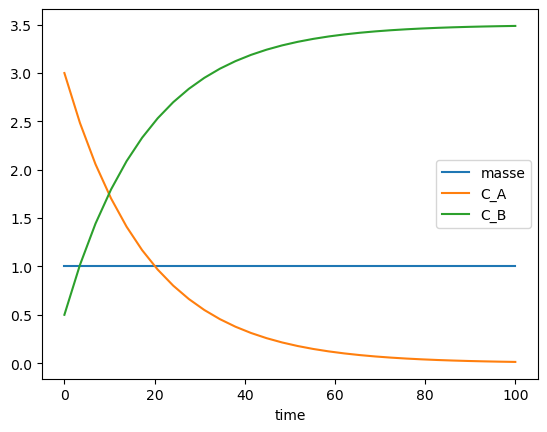

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
A = 1e13 # Arrhenius constant
T = 293.15 # Temperature [K]
E_a = 80000 # Activation energy [J/mol]
R = 8.31 # Ideal gas constant [J/molK]
rho = 1000 # density [kg/m3]
F_in = 0.2 # Inlet flowrate [m3/s]
h = 2.1 # Height of reactor
A_ = 1 # Cross-sectional area of reactor [m2]

V = A_*h  # Reactor volume [m3]
k = A*np.exp(-E_a/(R*T)) # Reaction rate constant
F_out = F_in # Steady state

def dUdt(U, t):
    m, C_A, C_B = U

    dmdt = rho*(F_in - F_out)
    dC_Adt = ( F_in*C_A - F_out*C_A )/ V-k*C_A
    dC_Bdt = ( F_in*C_B - F_out*C_B )/ V+k*C_A

    return [dmdt, dC_Adt, dC_Bdt]

# Create time domain
t_span = np.linspace(0, 100, 30)

# Initial condition
C_A0 = 3 # Initial concentration [mol/m3]
C_B0 = 0.5 # Initial concentration [mol/m3]
m0 = 1 # Initial mass in tank [kg]

Uzero = [m0, C_A0, C_B0]

solution = odeint(dUdt, Uzero, t_span)

# plot
plt.plot(t_span, solution[:, 0], label='masse');
plt.plot(t_span, solution[:, 1], label='C_A');
plt.plot(t_span, solution[:, 2], label='C_B');
plt.legend();
plt.xlabel('time'); 


$𝑦_1′=𝑦_1\left(\frac{Ω_m}{𝑦_1^3}+\frac{𝑦_3^2}{6.0}+\frac{𝑉(𝑦2)}{2 𝐻_0^2} \right)^{0.5} $

$𝑦_2′=𝑦_3$

$𝑦_3′=−3\frac{𝑦_1′}{𝑦1}𝑦_3−\frac{1}{𝐻^2_0} \frac{∂𝑣(𝑦2)}{∂𝑦_2}$


In [ ]:

def f(y,t):
    Xi = y[0]
    Yi = y[1]
    Zi = y[2]
    f0 = Xi*(omega/(Xi**3) + (Zi**2)/6.0 + (v0*np.exp(-l*Yi*k))/(rho_c))**(1.0/2.0)
    f1 =  Zi
    f2 =  -3*Zi*(H**2)*(omega/(Xi**3) + (Zi**2)/6.0 + (v0*np.exp(-l*Yi*k))/(rho_c))**0.5 + (l*k*v0*np.exp(-l*Yi*k))/(H**2)
    return [f0,f1,f2]

X0 = 1.0
Y0 = 1.0
Z0 = 1
y0 = [X0,Y0,Z0]
t = np.linspace(start=1.0,stop=0.0,num=10001)

soln = odeint(f,y0,t)
X = soln[:,0]
Y = soln[:,1]
Z = soln[:,2]  